In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import sys

## PAGA with enterocytes reordered and EEC merged

In [2]:
# Importing dataset
data = sc.read_h5ad('epithelia_v3.h5ad')
data

C:\Users\nvrib\anaconda3\lib\site-packages\anndata\compat\__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 10730 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'percent.mt', 'lane', 'SCT_snn_res.0.4', 'seurat_clusters', 'genotype', 'sample', 'droplet', 'status', 'marsh', 'sex', 'age', 'batch', 'barcode', 'cell.type.1', 'cell.type.2', 'SCT_snn_res.0.7', 'SCT_snn_res.0.6', 'SCT_snn_res.0.65', 'SCT_snn_res.0.8', 'cell.type.3', 'cell.type.4'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    obsp: 'distances'

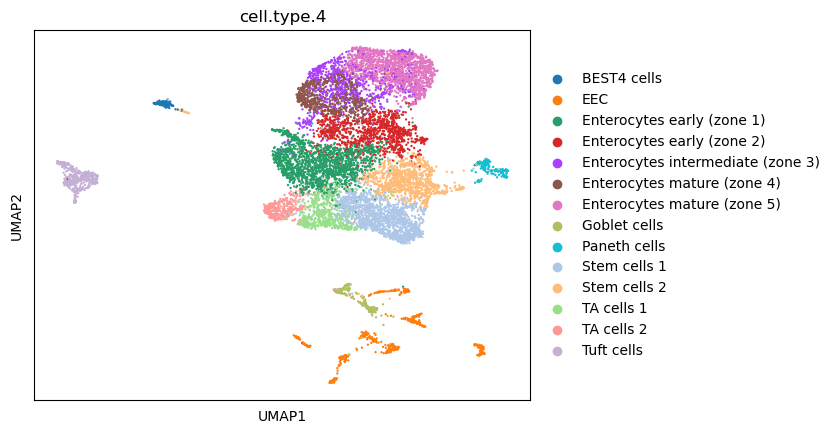

In [3]:
sc.pl.umap(data, color = 'cell.type.4')

In [4]:
# Spliting into control and CeD
control = data[data.obs['status'] == 'Ctrl']
ced = data[data.obs['status'] == 'CeD']

In [12]:
# Running PAGA
sc.tl.paga(control, groups = 'cell.type.4', neighbors_key = 'neighbors')

In [19]:
sc.tl.paga(ced, groups = 'cell.type.4', neighbors_key = 'neighbors')

In [13]:
print(control.uns['paga']['connectivities_tree'])

  (0, 2)	0.0544795696771048
  (0, 13)	0.017913484483807942
  (1, 7)	0.3829611502642929
  (3, 2)	0.42953461310144586
  (3, 4)	0.34040904630588786
  (5, 4)	0.902081172171152
  (6, 4)	0.44894389168982746
  (7, 12)	0.2755797594735648
  (8, 9)	0.1252536651857492
  (9, 11)	0.6092234546971684
  (10, 2)	0.3129227524604983
  (12, 10)	0.34069408348772395
  (12, 11)	0.46274082724019305


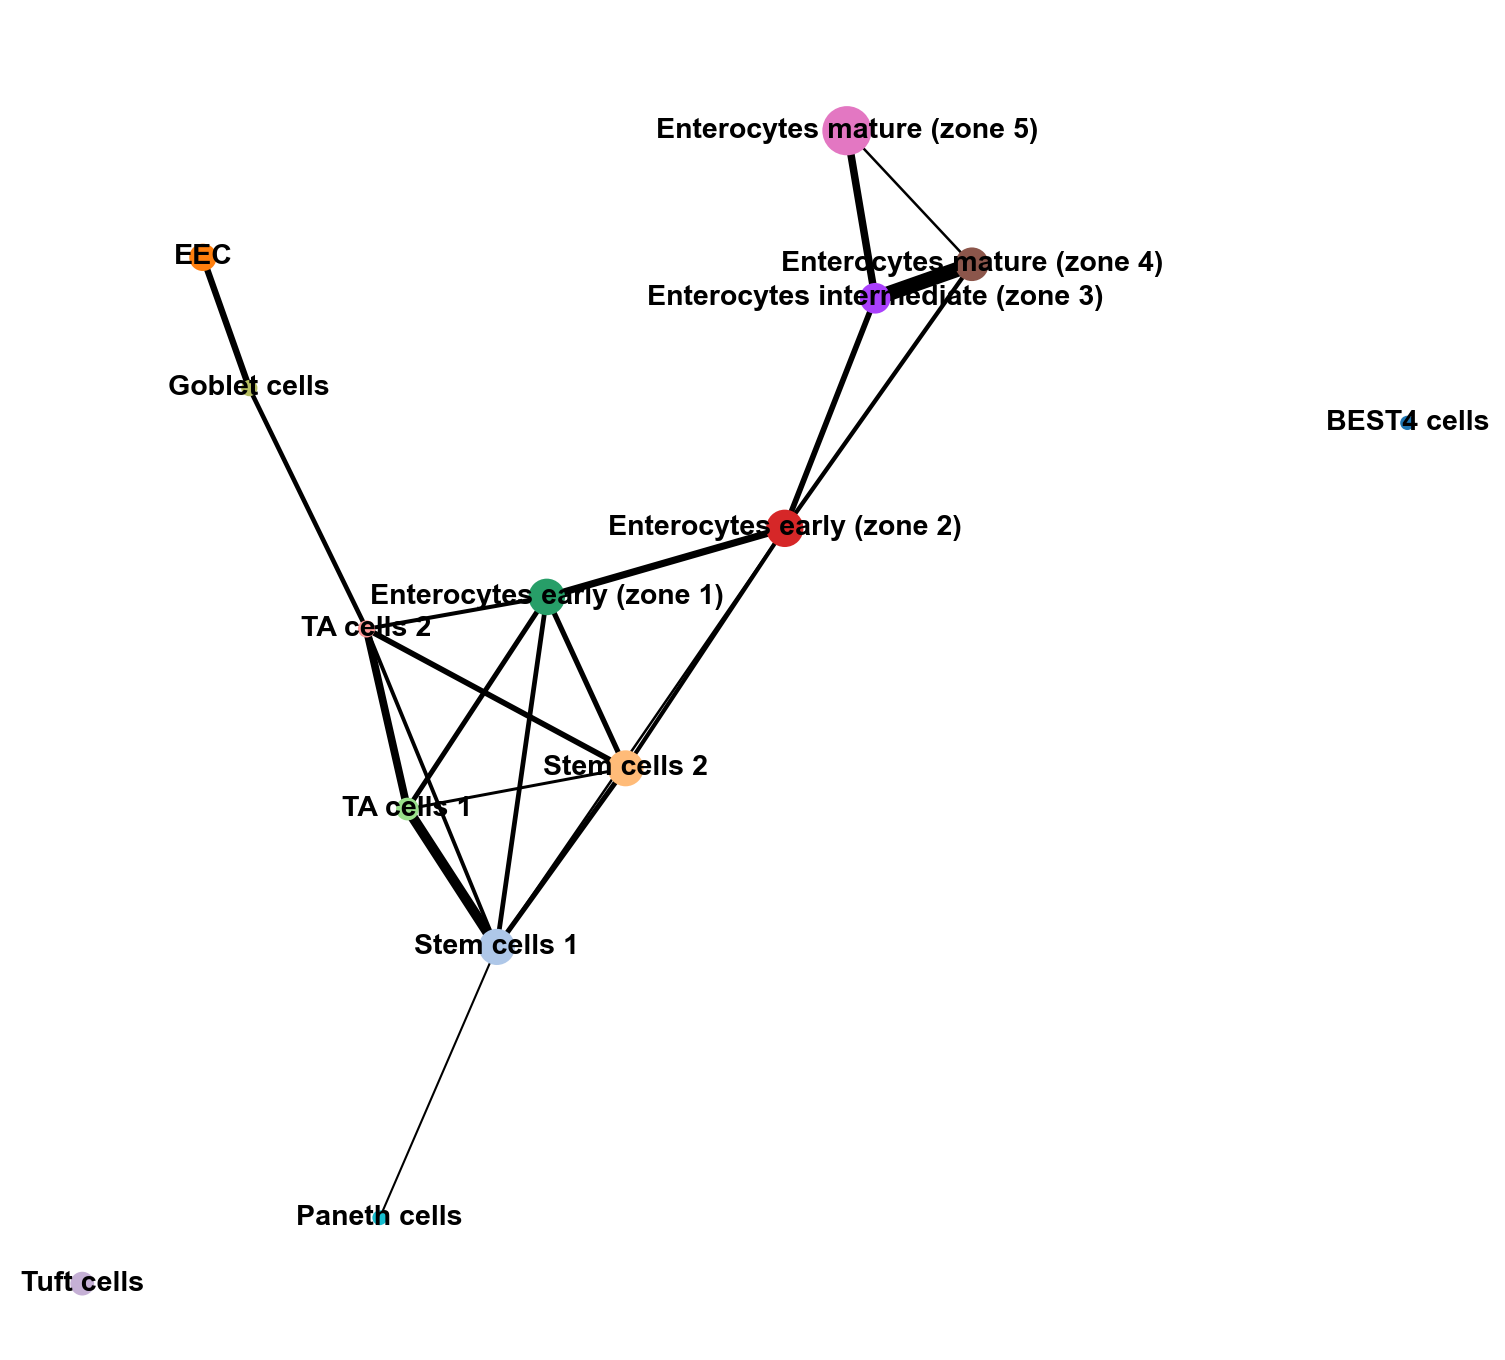

In [18]:
# Plotting PAGA - control
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(10, 10), facecolor='white')
sc.pl.paga(control, layout = 'fa', threshold = 0.1, node_size_power = 1)

In [21]:
control

AnnData object with n_obs × n_vars = 6393 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'percent.mt', 'lane', 'SCT_snn_res.0.4', 'seurat_clusters', 'genotype', 'sample', 'droplet', 'status', 'marsh', 'sex', 'age', 'batch', 'barcode', 'cell.type.1', 'cell.type.2', 'SCT_snn_res.0.7', 'SCT_snn_res.0.6', 'SCT_snn_res.0.65', 'SCT_snn_res.0.8', 'cell.type.3', 'cell.type.4'
    var: 'features'
    uns: 'neighbors', 'cell.type.4_colors', 'paga', 'cell.type.4_sizes'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    obsp: 'distances'

In [8]:
sc.tl.draw_graph(control, init_pos = 'paga', obsp = 'distances')

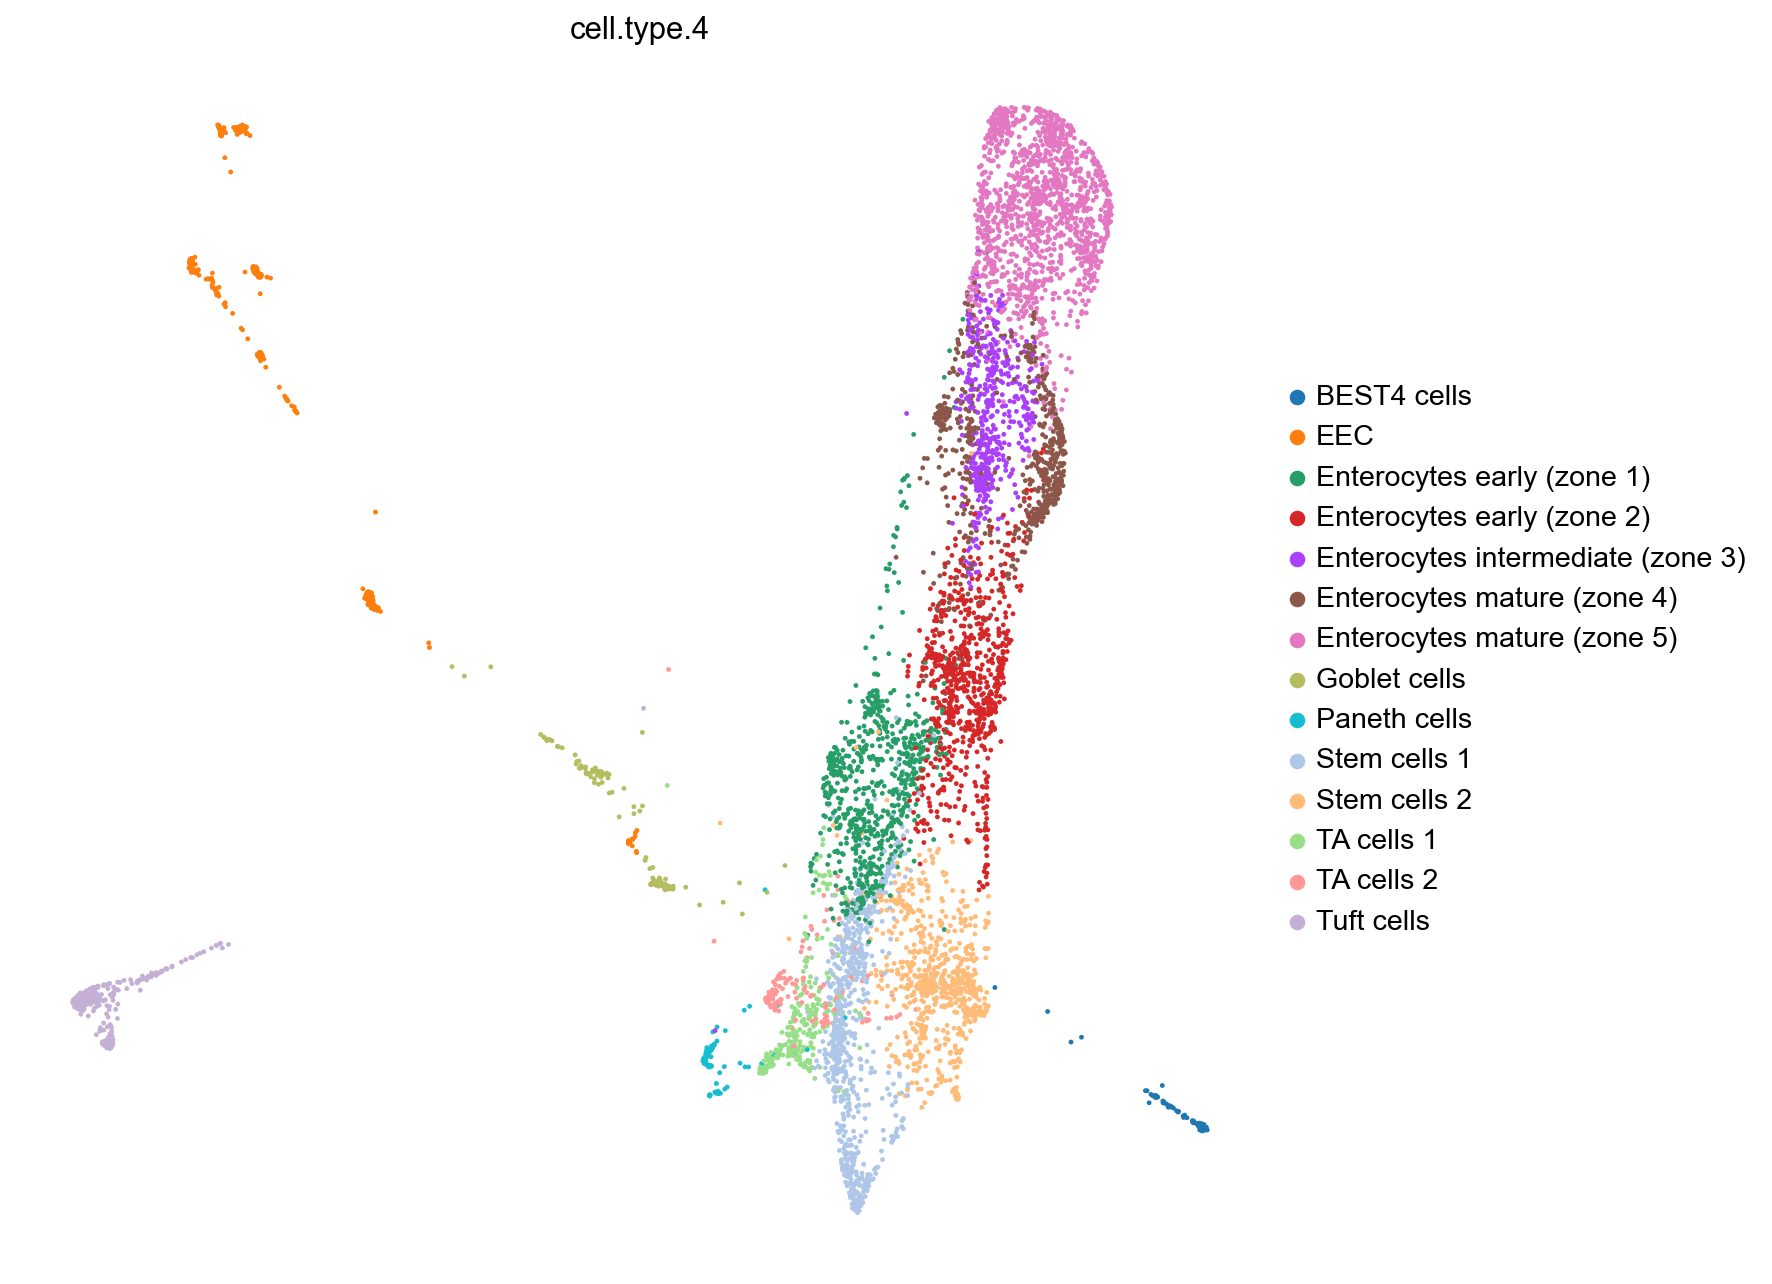

In [9]:
sc.pl.draw_graph(control, color = 'cell.type.4')

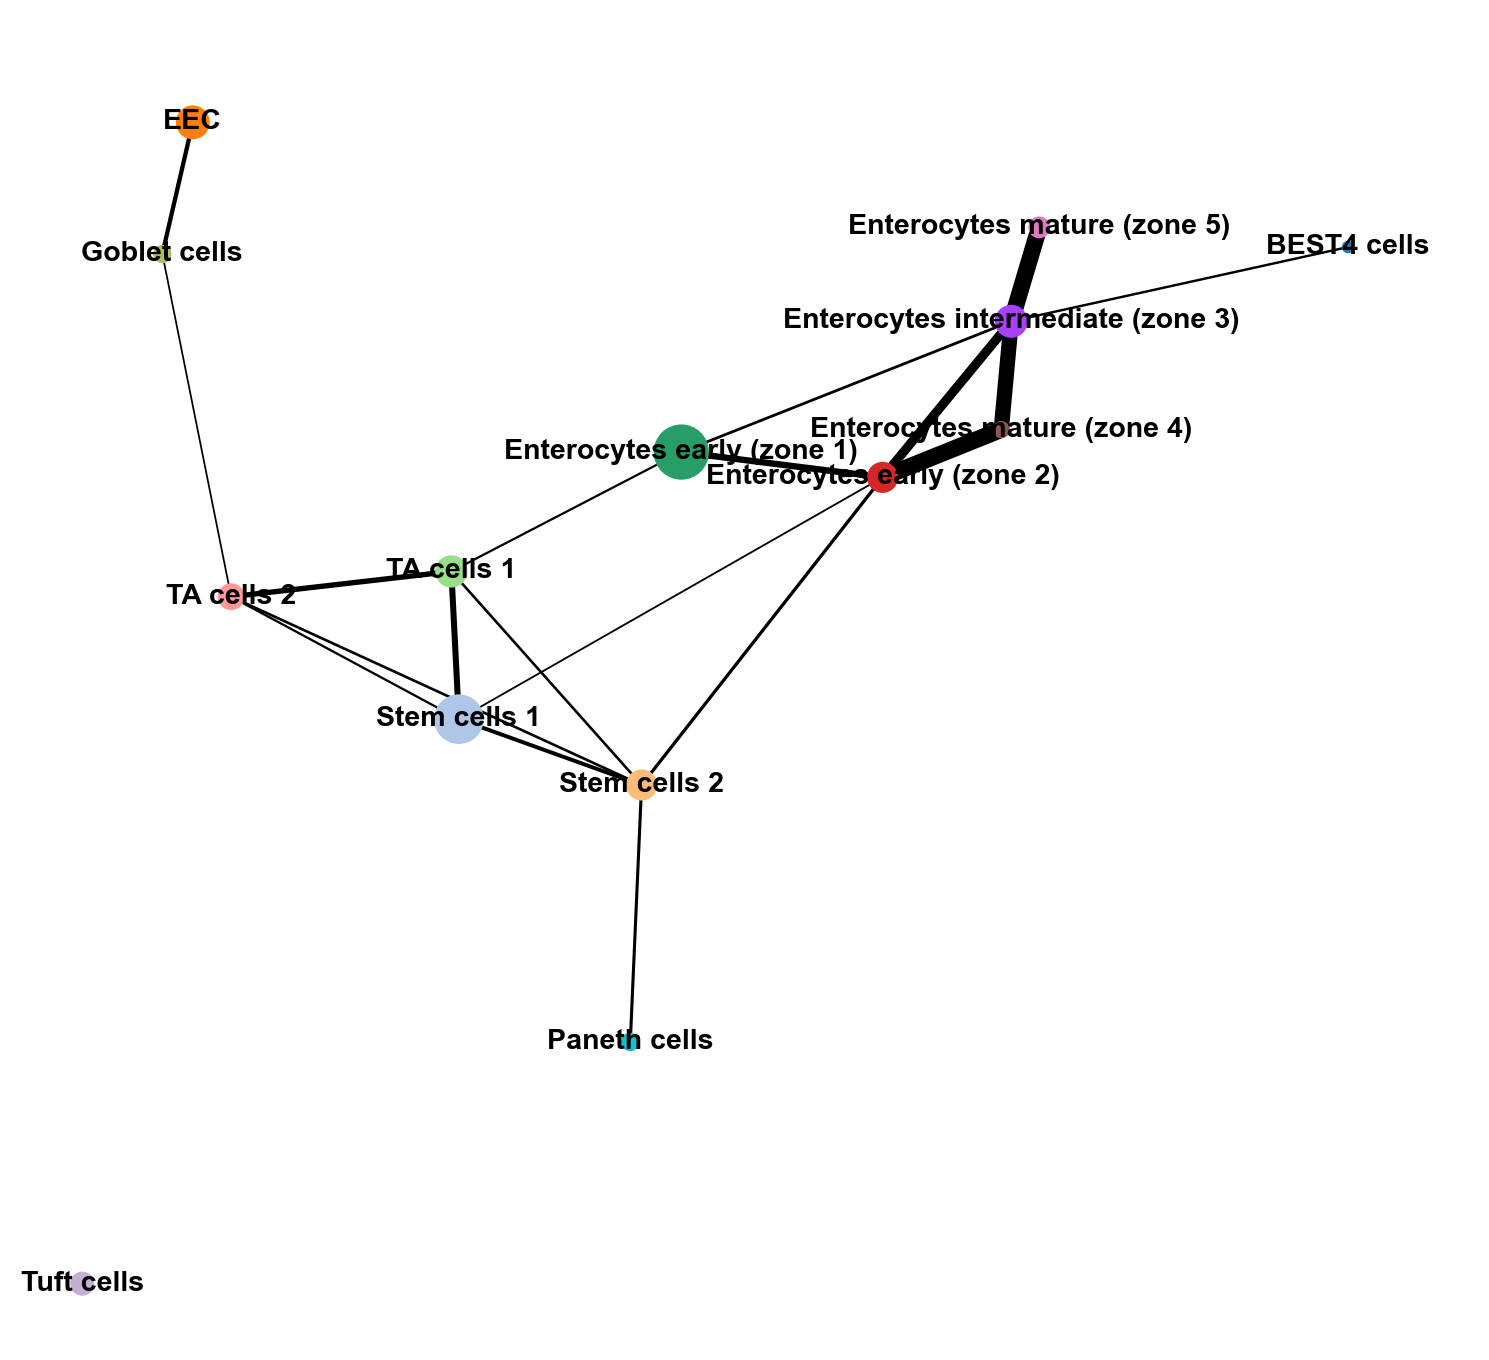

In [21]:
# Plotting PAGA - CeD
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(10, 10), facecolor='white')
sc.pl.paga(ced, layout = 'fa', threshold = 0.1, node_size_power = 1)